In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyscf.gto import Mole, basis
mol = Mole()

mol.atom = [
    ("Pt", [-2.0, 0.0, 0.0]), 
    ("Pt", [2.0, 0.0, 0.0]), 
    ("Pt", [0.0, -2.0, 0.0]),
    ("Pt", [0.0, 2.0, 0.0]),
]    
mol.basis = {'Pt': "lanl2dz"}
mol.ecp = {'Pt': "lanl2dz"}


In [3]:
from pyscf.scf import hf

mf = hf.RHF(mol)
mf.run()

Warn: Ipython shell catchs sys.args


converged SCF energy = -472.748907709696


In [4]:
S = hf.get_ovlp(mol)

In [5]:
S.shape


(88, 88)

In [7]:
# lanl2dz
88 * (88 + 1) / 2

3916.0

In [6]:
# cc-pvdz-pp
152 * (152 + 1) / 2

11628.0

In [23]:
mol.nelectron

72

In [9]:
s = mf.get_ovlp()
h = mf.get_hcore(mol)
p = mf.make_rdm1()
f = mf.get_fock(h, s, mf.get_veff(mol, p), p)


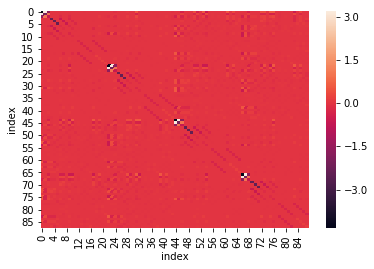

In [12]:
from SCFInitialGuess.utilities.analysis import matrix_error

matrix_error(f)
plt.show()

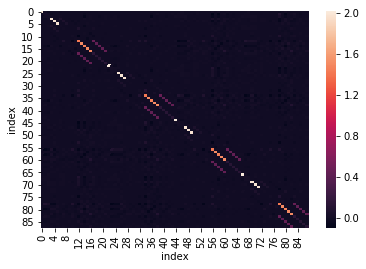

In [13]:
matrix_error(p)
plt.show()